---
# *Estatística Descritiva com Python*

In [48]:
# Importações
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import variation, iqr, shapiro
import plotly.graph_objects as go
from scipy import stats
import pylab
from scipy.stats import skew, kurtosis
import seaborn as sns

In [3]:
# Função para baixar os dados do Yahoo Finance 
def download_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [35]:
# Função para calcular estatísticas descritivas básicas
def descriptive_statiscs (data):
    # Retornos
    data['Return'] = data['Close'].pct_change() * 100
    
    # Remove NaN
    data = data.dropna()
    
    # Calculo estatísticas descritivas
    statistics = {
        'Média': round(np.mean(data['Return']), 3),
        'Mediana': round(np.median(data['Return']), 3),
        'Desvio-padrão': round(np.std(data['Return']), 3),
        'Mínimo': round(np.min(data['Return']), 3),
        'Máximo': round(np.max(data['Return']), 3),
        '25° Percentil': round(np.percentile(data['Return'], 25), 3),
        '75° Percentil': round(np.percentile(data['Return'], 75), 3),
        'IQR': round(iqr(data['Return']), 3),  # Intervalo Interquartil
        'CV': round(variation(data['Return']) * 100, 3),  # Coeficiente de Variação
        'Skewness': round(data['Return'].skew(), 3),
        'Kurtosis': round(data['Return'].kurtosis(), 3),
        'Shapiro-Wilk p-value': round(shapiro(data['Return'])[1], 6)  # Teste de Shapiro-Wilk para normalidade
    }
    
    return statistics

In [36]:
# Baixando os dados do yahoo finance 
ticker = 'ABEV3.SA'
start_date = '2020-01-01'
end_date = '2021-01-01'
data = download_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [37]:
# Estatísticas descritivas básicas
return_statistics = descriptive_statiscs(data)

In [38]:
print('Estatísticas Descritivas para os retornos de', ticker)

for key, value in return_statistics.items():
    print('------------------------------')
    print(f'-> {key}: {value}')

Estatísticas Descritivas para os retornos de ABEV3.SA
------------------------------
-> Média: -0.04
------------------------------
-> Mediana: -0.064
------------------------------
-> Desvio-padrão: 2.915
------------------------------
-> Mínimo: -15.782
------------------------------
-> Máximo: 9.871
------------------------------
-> 25° Percentil: -1.732
------------------------------
-> 75° Percentil: 1.524
------------------------------
-> IQR: 3.256
------------------------------
-> CV: -7351.536
------------------------------
-> Skewness: -0.557
------------------------------
-> Kurtosis: 5.002
------------------------------
-> Shapiro-Wilk p-value: 0.0


In [43]:
# Criação do histograma interativo
fig = go.Figure()

fig.add_trace(go.Histogram(x=data['Return'], 
                            marker=dict(color='skyblue'),
                            xbins=dict(size=1),
                            name='Retorno'))

fig.update_layout(title='Histograma de Retorno',
                  xaxis_title='Retorno %',
                  yaxis_title='Frequência',
                 template='simple_white')

fig.show()

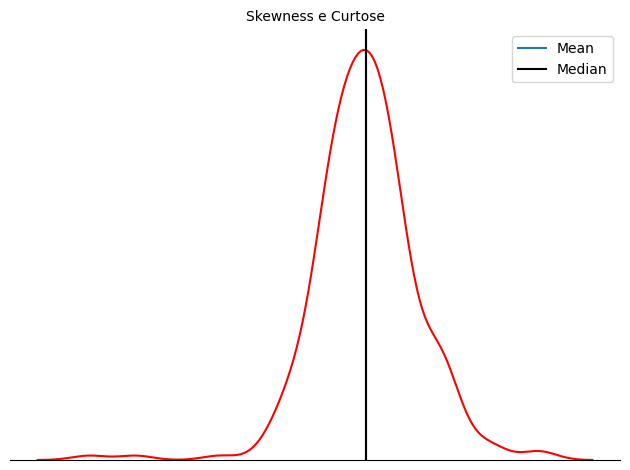

In [50]:
sns.kdeplot(data['Return'], color="red")

sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.title(f"Skewness e Curtose", fontdict=dict(fontsize=10))

# Find the mean, median, mode
mean_price = data['Return'].mean()
median_price =  data['Return'].median()

# Add vertical lines at the position of mean, median, mode
plt.axvline(mean_price, label="Mean")
plt.axvline(median_price, color="black", label="Median")
plt.tight_layout()
plt.legend();

In [51]:
# Transformando tudo em um unica função
def statistics_basic_view(ticker, start_date, end_date):
    import yfinance as yf 
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import variation, iqr, shapiro
    import plotly.graph_objects as go
    import seaborn as sns
    
    # Baixando os dados do yahoo finance 
    data = download_data(ticker, start_date, end_date)

    # Estatísticas descritivas básicas
    return_statistics = descriptive_statiscs(data)

    print('Estatísticas Descritivas para os retornos de', ticker)
    for key, value in return_statistics.items():
        print('------------------------------')
        print(f'-> {key}: {value}')

    # Criação do histograma interativo
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=data['Return'], 
                                marker=dict(color='skyblue'),
                                xbins=dict(size=1),
                                name='Retorno'))

    fig.update_layout(title='Histograma de Retorno',
                      xaxis_title='Retorno %',
                      yaxis_title='Frequência',
                      template='simple_white')

    fig.show()

    # Plot da curva de densidade
    sns.set(style="whitegrid")
    sns.kdeplot(data['Return'], color="red")
    sns.despine(top=True, right=True, left=True)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Skewness e Curtose", fontdict=dict(fontsize=10))

    # Encontre a média, mediana
    mean_price = data['Return'].mean()
    median_price =  data['Return'].median()

    # Adiciona linhas verticais na posição da média e mediana
    plt.axvline(mean_price, label="Mean")
    plt.axvline(median_price, color="black", label="Median")
    plt.tight_layout()
    plt.legend()

# Função para baixar os dados do Yahoo Finance 
def download_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Função para calcular estatísticas descritivas básicas
def descriptive_statiscs (data):
    # Retornos
    data['Return'] = data['Close'].pct_change() * 100
    
    # Remove NaN
    data = data.dropna()
    
    # Calculo estatísticas descritivas
    statistics = {
        'Média': round(np.mean(data['Return']), 3),
        'Mediana': round(np.median(data['Return']), 3),
        'Desvio-padrão': round(np.std(data['Return']), 3),
        'Mínimo': round(np.min(data['Return']), 3),
        'Máximo': round(np.max(data['Return']), 3),
        '25° Percentil': round(np.percentile(data['Return'], 25), 3),
        '75° Percentil': round(np.percentile(data['Return'], 75), 3),
        'IQR': round(iqr(data['Return']), 3),  # Intervalo Interquartil
        'CV': round(variation(data['Return']) * 100, 3),  # Coeficiente de Variação
        'Skewness': round(data['Return'].skew(), 3),
        'Kurtosis': round(data['Return'].kurtosis(), 3),
        'Shapiro-Wilk p-value': round(shapiro(data['Return'])[1], 6)  # Teste de Shapiro-Wilk para normalidade
    }
    
    return statistics

[*********************100%%**********************]  1 of 1 completed

Estatísticas Descritivas para os retornos de MSFT
------------------------------
-> Média: 0.106
------------------------------
-> Mediana: 0.095
------------------------------
-> Desvio-padrão: 2.054
------------------------------
-> Mínimo: -14.739
------------------------------
-> Máximo: 14.217
------------------------------
-> 25° Percentil: -0.946
------------------------------
-> 75° Percentil: 1.2
------------------------------
-> IQR: 2.145
------------------------------
-> CV: 1941.971
------------------------------
-> Skewness: 0.027
------------------------------
-> Kurtosis: 6.492
------------------------------
-> Shapiro-Wilk p-value: 0.0


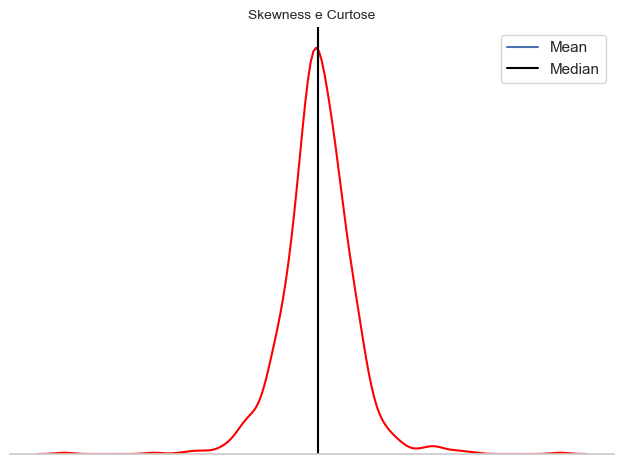

In [52]:
statistics_basic_view('MSFT', '2020-01-01', '2024-01-01')